In [106]:
import whisper

whisper.available_models()

['tiny.en',
 'tiny',
 'base.en',
 'base',
 'small.en',
 'small',
 'medium.en',
 'medium',
 'large-v1',
 'large-v2',
 'large-v3',
 'large',
 'large-v3-turbo',
 'turbo']

In [107]:
model = whisper.load_model("tiny")
model

Whisper(
  (encoder): AudioEncoder(
    (conv1): Conv1d(80, 384, kernel_size=(3,), stride=(1,), padding=(1,))
    (conv2): Conv1d(384, 384, kernel_size=(3,), stride=(2,), padding=(1,))
    (blocks): ModuleList(
      (0-3): 4 x ResidualAttentionBlock(
        (attn): MultiHeadAttention(
          (query): Linear(in_features=384, out_features=384, bias=True)
          (key): Linear(in_features=384, out_features=384, bias=False)
          (value): Linear(in_features=384, out_features=384, bias=True)
          (out): Linear(in_features=384, out_features=384, bias=True)
        )
        (attn_ln): LayerNorm((384,), eps=1e-05, elementwise_affine=True)
        (mlp): Sequential(
          (0): Linear(in_features=384, out_features=1536, bias=True)
          (1): GELU(approximate='none')
          (2): Linear(in_features=1536, out_features=384, bias=True)
        )
        (mlp_ln): LayerNorm((384,), eps=1e-05, elementwise_affine=True)
      )
    )
    (ln_post): LayerNorm((384,), eps=1e-05,

In [108]:
audio = whisper.load_audio("hi.aac")
audio.shape

RuntimeError: Failed to load audio: ffmpeg version 7.1.1-1ubuntu1.1 Copyright (c) 2000-2025 the FFmpeg developers
  built with gcc 14 (Ubuntu 14.2.0-19ubuntu2)
  configuration: --prefix=/usr --extra-version=1ubuntu1.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --disable-libmfx --disable-omx --enable-gnutls --enable-libaom --enable-libass --enable-libbs2b --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libglslang --enable-libgme --enable-libgsm --enable-libharfbuzz --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-libzimg --enable-openal --enable-opencl --enable-opengl --disable-sndio --enable-libvpl --enable-libdc1394 --enable-libdrm --enable-libiec61883 --enable-chromaprint --enable-frei0r --enable-ladspa --enable-libbluray --enable-libcaca --enable-libdvdnav --enable-libdvdread --enable-libjack --enable-libpulse --enable-librabbitmq --enable-librist --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libx264 --enable-libzmq --enable-libzvbi --enable-lv2 --enable-sdl2 --enable-libplacebo --enable-librav1e --enable-pocketsphinx --enable-librsvg --enable-libjxl --enable-shared
  libavutil      59. 39.100 / 59. 39.100
  libavcodec     61. 19.101 / 61. 19.101
  libavformat    61.  7.100 / 61.  7.100
  libavdevice    61.  3.100 / 61.  3.100
  libavfilter    10.  4.100 / 10.  4.100
  libswscale      8.  3.100 /  8.  3.100
  libswresample   5.  3.100 /  5.  3.100
  libpostproc    58.  3.100 / 58.  3.100
[in#0 @ 0x575f14b49f40] Error opening input: No such file or directory
Error opening input file hi.aac.
Error opening input files: No such file or directory


In [ ]:
audio = whisper.pad_or_trim(audio)
audio.shape

(480000,)

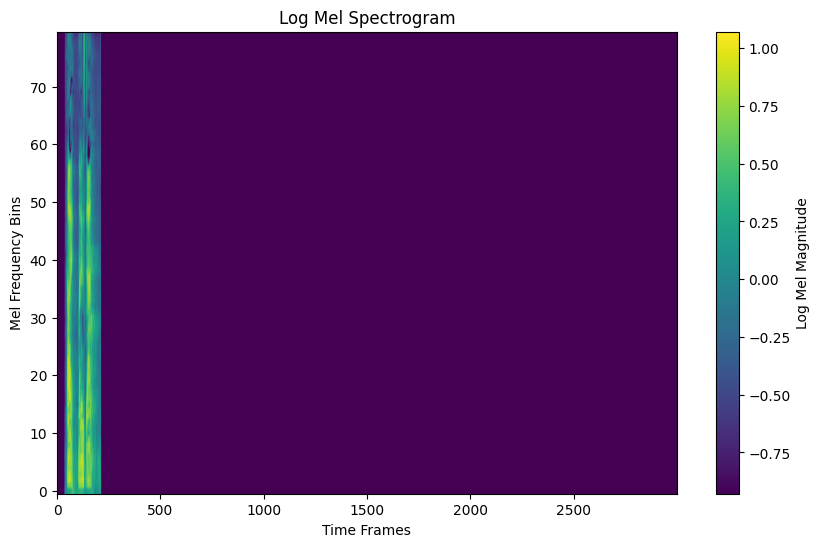

In [ ]:
from utils import show_log_mel

log_mel = whisper.log_mel_spectrogram(audio, n_mels=model.dims.n_mels).to(model.device)
show_log_mel(log_mel)

In [ ]:
from whisper.tokenizer import get_tokenizer

tknsr = get_tokenizer(multilingual=False)
tknsr

Tokenizer(encoding=<Encoding 'gpt2.tiktoken'>, num_languages=99, language=None, task=None, sot_sequence=(50257,), special_tokens={'<|6.20|>': 50673, '<|24.78|>': 51602, '<|24.98|>': 51612, '<|22.18|>': 51472, '<|29.70|>': 51848, '<|23.04|>': 51515, '<|5.62|>': 50644, '<|25.34|>': 51630, '<|19.52|>': 51339, '<|12.64|>': 50995, '<|23.24|>': 51525, '<|5.68|>': 50647, '<|tg|>': 50330, '<|19.22|>': 51324, '<|27.58|>': 51742, '<|26.84|>': 51705, '<|5.32|>': 50629, '<|1.46|>': 50436, '<|3.36|>': 50531, '<|vi|>': 50277, '<|7.88|>': 50757, '<|17.60|>': 51243, '<|22.66|>': 51496, '<|2.36|>': 50481, '<|16.76|>': 51201, '<|29.44|>': 51835, '<|1.60|>': 50443, '<|6.84|>': 50705, '<|18.08|>': 51267, '<|12.76|>': 51001, '<|13.58|>': 51042, '<|9.68|>': 50847, '<|17.50|>': 51238, '<|19.70|>': 51348, '<|4.36|>': 50581, '<|26.80|>': 51703, '<|20.10|>': 51368, '<|16.72|>': 51199, '<|22.50|>': 51488, '<|18.76|>': 51301, '<|23.92|>': 51559, '<|16.82|>': 51204, '<|18.00|>': 51263, '<|17.26|>': 51226, '<|28.66

In [ ]:
tknsr.encode("hello world")

[31373, 995]

In [ ]:
tknsr = get_tokenizer(multilingual=True)
tknsr

Tokenizer(encoding=<Encoding 'multilingual.tiktoken'>, num_languages=99, language='en', task='transcribe', sot_sequence=(50258, 50259, 50359), special_tokens={'<|6.20|>': 50674, '<|24.78|>': 51603, '<|24.98|>': 51613, '<|22.18|>': 51473, '<|29.70|>': 51849, '<|23.04|>': 51516, '<|5.62|>': 50645, '<|25.34|>': 51631, '<|19.52|>': 51340, '<|12.64|>': 50996, '<|23.24|>': 51526, '<|5.68|>': 50648, '<|tg|>': 50331, '<|19.22|>': 51325, '<|27.58|>': 51743, '<|26.84|>': 51706, '<|5.32|>': 50630, '<|1.46|>': 50437, '<|3.36|>': 50532, '<|vi|>': 50278, '<|7.88|>': 50758, '<|17.60|>': 51244, '<|22.66|>': 51497, '<|2.36|>': 50482, '<|16.76|>': 51202, '<|29.44|>': 51836, '<|1.60|>': 50444, '<|6.84|>': 50706, '<|18.08|>': 51268, '<|12.76|>': 51002, '<|13.58|>': 51043, '<|9.68|>': 50848, '<|17.50|>': 51239, '<|19.70|>': 51349, '<|4.36|>': 50582, '<|26.80|>': 51704, '<|20.10|>': 51369, '<|16.72|>': 51200, '<|22.50|>': 51489, '<|18.76|>': 51302, '<|23.92|>': 51560, '<|16.82|>': 51205, '<|18.00|>': 51264,

In [ ]:
tknsr.encode("hello world")

[675, 1913, 1002]

In [ ]:
_, probs = model.detect_language(log_mel)
print(f"Detected language: {max(probs, key=probs.get)}")  # type: ignore

Detected language: en


In [ ]:
bare_options = whisper.DecodingOptions()
bare_options


DecodingOptions(task='transcribe', language=None, temperature=0.0, sample_len=None, best_of=None, beam_size=None, patience=None, length_penalty=None, prompt=None, prefix=None, suppress_tokens='-1', suppress_blank=True, without_timestamps=False, max_initial_timestamp=1.0, fp16=True)

In [ ]:
result = whisper.decode(model, log_mel, bare_options)
result

DecodingResult(audio_features=tensor([[ 0.0889,  0.0660,  0.0322,  ..., -0.0457,  0.1034,  0.0657],
        [-0.7446,  0.2876,  0.1311,  ...,  0.8701,  0.2333,  0.6533],
        [-0.6479,  1.7627,  0.2290,  ...,  0.3687, -0.1077,  1.0771],
        ...,
        [ 0.7266, -1.8018,  0.2468,  ..., -0.2686, -0.4424,  0.4978],
        [-0.2239, -0.5791,  0.0555,  ...,  0.5781,  0.0969,  0.3047],
        [ 0.2059, -0.1360, -1.3916,  ...,  0.2351, -0.4209, -0.1219]],
       dtype=torch.float16), language='en', language_probs=None, tokens=[50364, 2421, 11, 452, 1315, 307, 3394, 13, 50464], text='Hi, my name is Dan.', avg_logprob=-0.43665165901184083, no_speech_prob=0.05164943262934685, temperature=0.0, compression_ratio=0.7037037037037037)

In [ ]:
result.text  # type: ignore

'Hi, my name is Dan.'

In [ ]:
audio = whisper.load_audio("./samples/chicago-to-texas.m4a")
audio.shape
# i.e. 16_000 samples per second * 650 seconds =~ 10_400_000 samples

(10410342,)

In [ ]:
from whisper.audio import SAMPLE_RATE, CHUNK_LENGTH

# we can crunch how many 30s intervals the audio should be broken down into
n = int(audio.shape[0] / SAMPLE_RATE // CHUNK_LENGTH + 1)
samples_per_interval = SAMPLE_RATE * CHUNK_LENGTH
print(f"Number of intervals: {n}, samples per interval: {samples_per_interval}")

intervals = []
for i in range(n):
    start = i * samples_per_interval
    end = start + samples_per_interval
    intervals.append(audio[start:end])

# last interval should be shorter than 30s (but will be padded out)
intervals[-1].shape


Number of intervals: 22, samples per interval: 480000


(330342,)

In [ ]:
import sounddevice as sd

middle = intervals[9]
sd.play(middle, samplerate=SAMPLE_RATE)

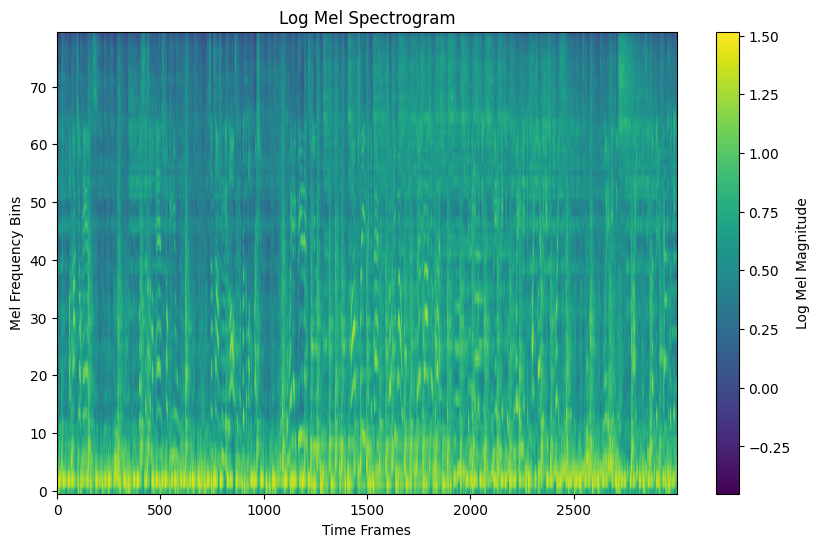

In [ ]:
audio = whisper.pad_or_trim(middle)
middle_mel = whisper.log_mel_spectrogram(audio, n_mels=model.dims.n_mels).to(model.device)
show_log_mel(middle_mel)

In [ ]:
result = whisper.decode(model, middle_mel, bare_options)
result.text  # type: ignore

"I'm not your hands, but a system of hands choking you Sometimes you can get lost in the rhythm of oppression The way they beat it into you, all trees in your back Showed you well, that is not your flesh The minute with you, the minute make you The way they make your fight fire into grace"

In [ ]:
audio_samples = []
mels = []
for interval in intervals:
  audio = whisper.pad_or_trim(interval)
  audio_samples.append(audio)
  mel = whisper.log_mel_spectrogram(audio, n_mels=model.dims.n_mels).to(model.device)
  mels.append(mel)

# see that final interval is now padded out to 30s (i.e. 480_000 samples)
audio_samples[-1].shape

(480000,)

In [ ]:
# note that the shape is embed_dim x layers (i.e. reversed compared to usual arrangement)
mels[-1].shape

torch.Size([80, 3000])

In [ ]:
from time import perf_counter

t0 = perf_counter()
lyrics = []
for mel in mels:
  result = whisper.decode(model, mel, bare_options)
  print(result.text)  # type: ignore
  lyrics.append(result.text)  # type: ignore
t = perf_counter() - t0
print(f"Decoded {len(lyrics)} intervals in {t:.2f} seconds, i.e. {len(lyrics) / t:.2f} intervals per second")

" ".join(lyrics)

The
I'm gonna be the one who's gonna be the one who's gonna be the one who's gonna be the one who's gonna be the one who's gonna be the one who's gonna be the one who's gonna be the one who's gonna be the one who's gonna be the one who's gonna be the one who's gonna be the one who's gonna be the one who's gonna be the one who's gonna be the one who's gonna be the one who's gonna be the one who's gonna be the one who's gonna be the one who's gonna be the one who's gonna be the one who's gonna be the one who's gonna be the one who's gonna be the one who's gonna be the one who's gonna be the one who's gonna be the one who's gonna be the one who's gonna be the one who's gonna be the one who's gonna be the one who's gonna be the one who's gonna be the one who's gonna be the one who's gonna be the one who's gonna be the one who's gonna be the one who
I'm gonna do it.
I'm not only disappearing, I don't do this again. Not only do we disappear.
Other ways to find ourselves murder. Since the Sou

"The I'm gonna be the one who's gonna be the one who's gonna be the one who's gonna be the one who's gonna be the one who's gonna be the one who's gonna be the one who's gonna be the one who's gonna be the one who's gonna be the one who's gonna be the one who's gonna be the one who's gonna be the one who's gonna be the one who's gonna be the one who's gonna be the one who's gonna be the one who's gonna be the one who's gonna be the one who's gonna be the one who's gonna be the one who's gonna be the one who's gonna be the one who's gonna be the one who's gonna be the one who's gonna be the one who's gonna be the one who's gonna be the one who's gonna be the one who's gonna be the one who's gonna be the one who's gonna be the one who's gonna be the one who's gonna be the one who's gonna be the one who's gonna be the one who's gonna be the one who I'm gonna do it. I'm not only disappearing, I don't do this again. Not only do we disappear. Other ways to find ourselves murder. Since the So

In [ ]:
# compare with tiny.en
model_en = whisper.load_model("tiny.en")
en_options = whisper.DecodingOptions(language="en")

t0 = perf_counter()
lyrics = []
for mel in mels:
  result = whisper.decode(model_en, mel, en_options)
  print(result.text)  # type: ignore
  lyrics.append(result.text)  # type: ignore
t = perf_counter() - t0
print(f"Decoded {len(lyrics)} intervals in {t:.2f} seconds, i.e. {len(lyrics) / t:.2f} intervals per second")

" ".join(lyrics)

The
I'm going to go to the next one.
I'm not going to do it.
Not only do we disappear, not only do we disappear.
other ways to find ourselves murder. Since the southern flag came down, ain't nothing left, set the jails and burnin' churches. And all of them cotton fields, picked the bear a lifetime of picking. We disappear, we disappear.
Right under the watchful eyes of those great bus and jail cells at night we just appear. There's no justice rehabilitation. No religion either. Just four pills and a
America. We continue to disappear. We decide right after breakfast. Soon as master rings the bell. The sound sends us back to a time when death was a blessing sent from God. When you said by any means necessary looking into your daughter's eyes
There'll be no slave, no bad advice, no prison guards, bitch. No lynched bodies, swingin' to the tomb of American justice. Between me and God, she better off gone. We go, bitch. I don't wanna say dead, not too loud.
Don't want to make God angry. And 

"The I'm going to go to the next one. I'm not going to do it. Not only do we disappear, not only do we disappear. other ways to find ourselves murder. Since the southern flag came down, ain't nothing left, set the jails and burnin' churches. And all of them cotton fields, picked the bear a lifetime of picking. We disappear, we disappear. Right under the watchful eyes of those great bus and jail cells at night we just appear. There's no justice rehabilitation. No religion either. Just four pills and a America. We continue to disappear. We decide right after breakfast. Soon as master rings the bell. The sound sends us back to a time when death was a blessing sent from God. When you said by any means necessary looking into your daughter's eyes There'll be no slave, no bad advice, no prison guards, bitch. No lynched bodies, swingin' to the tomb of American justice. Between me and God, she better off gone. We go, bitch. I don't wanna say dead, not too loud. Don't want to make God angry. And

In [ ]:
# compare with base
model_base = whisper.load_model("base")

t0 = perf_counter()
lyrics = []
for mel in mels:
  result = whisper.decode(model_base, mel, bare_options)
  print(result.text)  # type: ignore
  lyrics.append(result.text)  # type: ignore
t = perf_counter() - t0
print(f"Decoded {len(lyrics)} intervals in {t:.2f} seconds, i.e. {len(lyrics) / t:.2f} intervals per second")

" ".join(lyrics)

Music
I'm not going to be able to do it.
I'm not going to be able to do it. I'm not going to be able to do it. I'm not going to be able to do it. I'm not going to be able to do it. I'm not going to be able to do it. I'm not going to be able to do it. I'm not going to be able to do it. I'm not going to be able to do it. I'm not going to be able to do it. I'm not going to be able to do it. I'm not going to be able to do it. I'm not going to be able to do it. I'm not going to be able to do it. I'm not going to be able to do it.
I don't want to be disappeared. I don't want to be disappeared. Not only do we disappear, we disappear.
Other ways to find ourselves murdered. Since the southern flag came down, ain't nothing left set gels and burning churches. And all I'm cotton fields, pick the bear, like time, a pickin' We disappear, we disappear.
Right under the watchful eyes of those great bus and jail cells at night we disappear. There's no justice, rehabilitation, no religion either.
America

"Music I'm not going to be able to do it. I'm not going to be able to do it. I'm not going to be able to do it. I'm not going to be able to do it. I'm not going to be able to do it. I'm not going to be able to do it. I'm not going to be able to do it. I'm not going to be able to do it. I'm not going to be able to do it. I'm not going to be able to do it. I'm not going to be able to do it. I'm not going to be able to do it. I'm not going to be able to do it. I'm not going to be able to do it. I'm not going to be able to do it. I don't want to be disappeared. I don't want to be disappeared. Not only do we disappear, we disappear. Other ways to find ourselves murdered. Since the southern flag came down, ain't nothing left set gels and burning churches. And all I'm cotton fields, pick the bear, like time, a pickin' We disappear, we disappear. Right under the watchful eyes of those great bus and jail cells at night we disappear. There's no justice, rehabilitation, no religion either. Americ

In [ ]:
# compare with base.en
model_base_en = whisper.load_model("base.en")
en_options = whisper.DecodingOptions(language="en")

t0 = perf_counter()
lyrics = []
for mel in mels:
  result = whisper.decode(model_base_en, mel, en_options)
  print(result.text)  # type: ignore
  lyrics.append(result.text)  # type: ignore
t = perf_counter() - t0
print(f"Decoded {len(lyrics)} intervals in {t:.2f} seconds, i.e. {len(lyrics) / t:.2f} intervals per second")

" ".join(lyrics)

100%|███████████████████████████████████████| 139M/139M [00:16<00:00, 9.07MiB/s]


["The Star-Spangled Banner"]
So
So
Not only do we disappear, not only do we disappear, not only do we disappear, not only do we
other ways to find ourselves murdered. Since the southern flag came down, ain't nothing left set the jails and burning churches. And all I'm cotton fields picked bare, lifetime of picking. We disappear, we disappear.
Right under the watchful eyes of those great bus and jail cells at night we disappear. There's no justice, rehabilitation, no religion either.
America. We continue to disappear. We decide right after breakfast. Soon as Master rings the bell. The sound sends us back to a time when death was a blessing sent from God. When you said by any
No be no slave, no bad at wife, no prison gods bitch. No lynch bodies swingin' to the tune of American justice. Between me and God she better off gone, gone, yeah. I don't wanna say dead, not too loud.
Don't wanna make God angry And ain't nobody ever Except God ever Don't save us She said it took God 272 years To fr

'["The Star-Spangled Banner"] So So Not only do we disappear, not only do we disappear, not only do we disappear, not only do we other ways to find ourselves murdered. Since the southern flag came down, ain\'t nothing left set the jails and burning churches. And all I\'m cotton fields picked bare, lifetime of picking. We disappear, we disappear. Right under the watchful eyes of those great bus and jail cells at night we disappear. There\'s no justice, rehabilitation, no religion either. America. We continue to disappear. We decide right after breakfast. Soon as Master rings the bell. The sound sends us back to a time when death was a blessing sent from God. When you said by any No be no slave, no bad at wife, no prison gods bitch. No lynch bodies swingin\' to the tune of American justice. Between me and God she better off gone, gone, yeah. I don\'t wanna say dead, not too loud. Don\'t wanna make God angry And ain\'t nobody ever Except God ever Don\'t save us She said it took God 272 ye

In [ ]:
# condense the logic for chopping up a track and decoding segments
audio = whisper.load_audio("./samples/433.aac")
n = int(audio.shape[0] / SAMPLE_RATE // CHUNK_LENGTH + 1)

mels = []
for i in range(n):
  start = i * samples_per_interval
  end = start + samples_per_interval
  audio = whisper.pad_or_trim(audio[start:end])
  mel = whisper.log_mel_spectrogram(audio, n_mels=model.dims.n_mels).to(model.device)
  mels.append(mel)


In [109]:
model_sm = whisper.load_model("small")

t0 = perf_counter()
lyrics = []
for mel in mels:
  result = whisper.decode(model_sm, mel, en_options)
  txt = result.text  # type: ignore
  print(txt)
  lyrics.append(txt)
t = perf_counter() - t0
print(f"Decoded {len(lyrics)} intervals in {t:.2f} seconds, i.e. {len(lyrics) / t:.2f} intervals per second")

" ".join(lyrics)

100%|███████████████████████████████████████| 461M/461M [00:27<00:00, 17.4MiB/s]


And now a performance of John Cage's 433. Please welcome our soloist, William Marx.
you
you
you
you
you
you
you
you
you
you
you
you
you
you
you
Decoded 16 intervals in 219.29 seconds, i.e. 0.07 intervals per second


"And now a performance of John Cage's 433. Please welcome our soloist, William Marx. you you you you you you you you you you you you you you you"